In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/Salary_Data.csv")


In [3]:
df.shape

(375, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
df.drop_duplicates()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [7]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
df_clean = df.dropna()

In [9]:
df_clean.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [10]:
df_clean["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [11]:
X = df_clean.drop('Salary', axis=1)

In [12]:
num_cols = X.select_dtypes(include=['float64']).columns.tolist()

cat_cols = X.select_dtypes(include=['object']).columns.tolist()

Univariate Variable Analysis



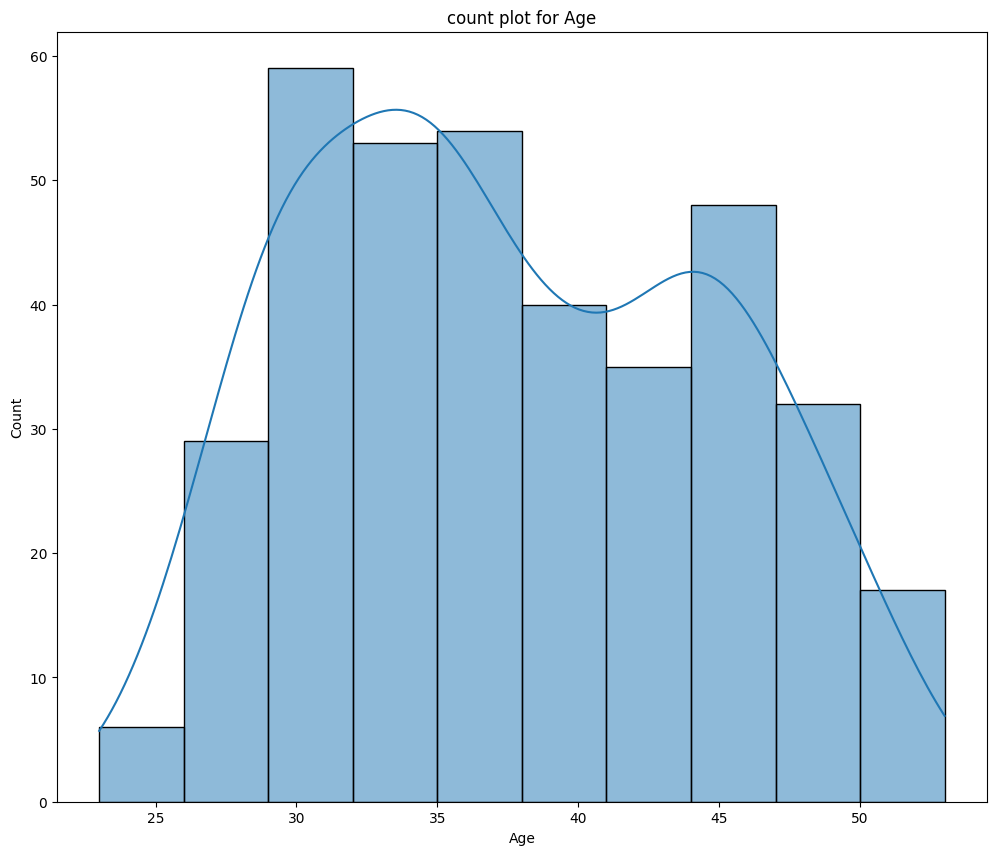

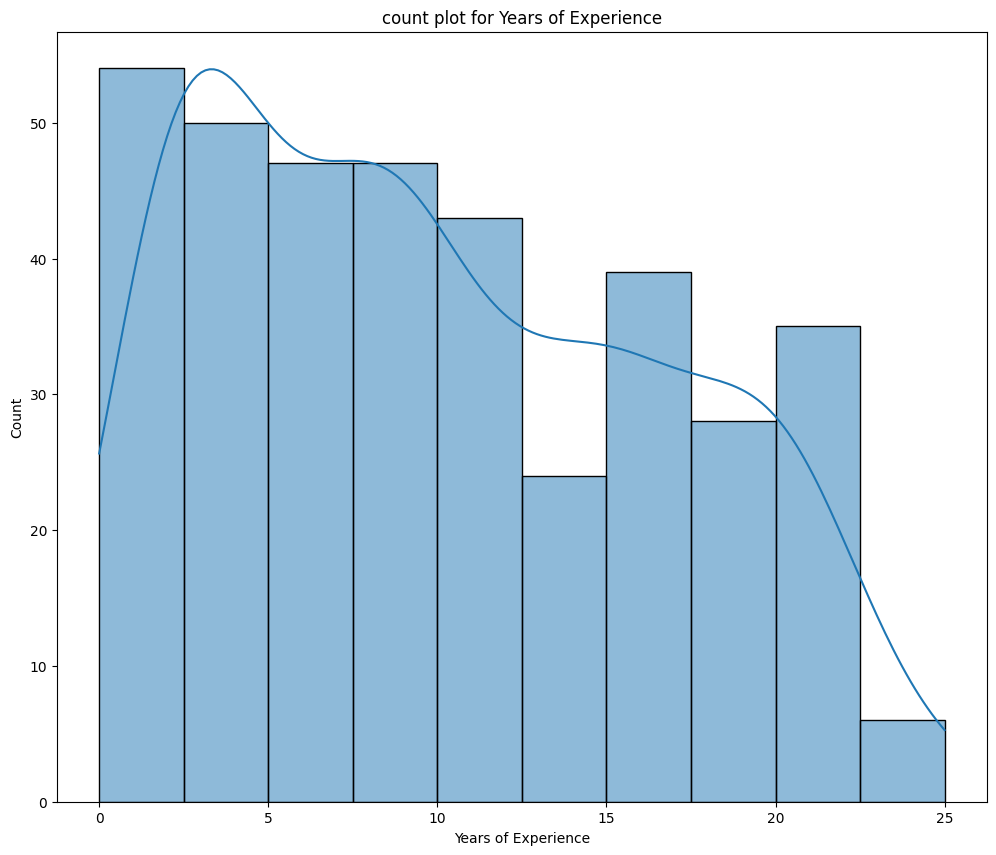

In [13]:
### num feature 


for col in num_cols:
    plt.figure(figsize=(12,10))
    sns.histplot(x=col,data=df_clean, kde=True)
    plt.title(f"count plot for {col}")
    plt.show()

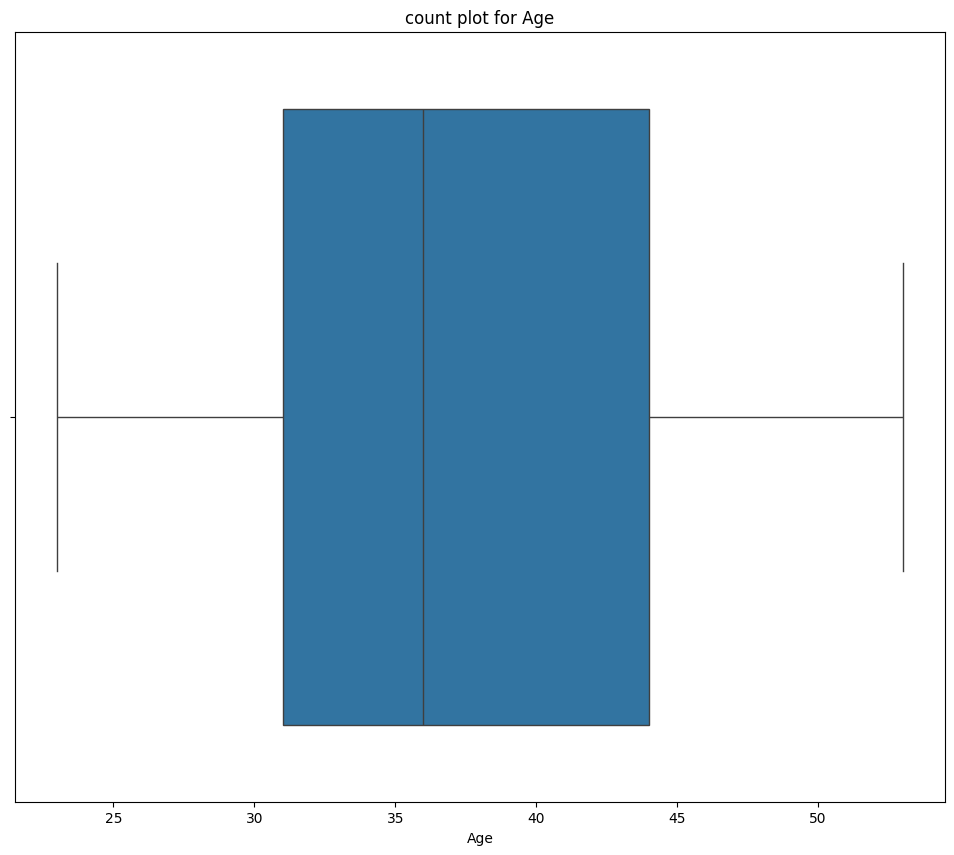

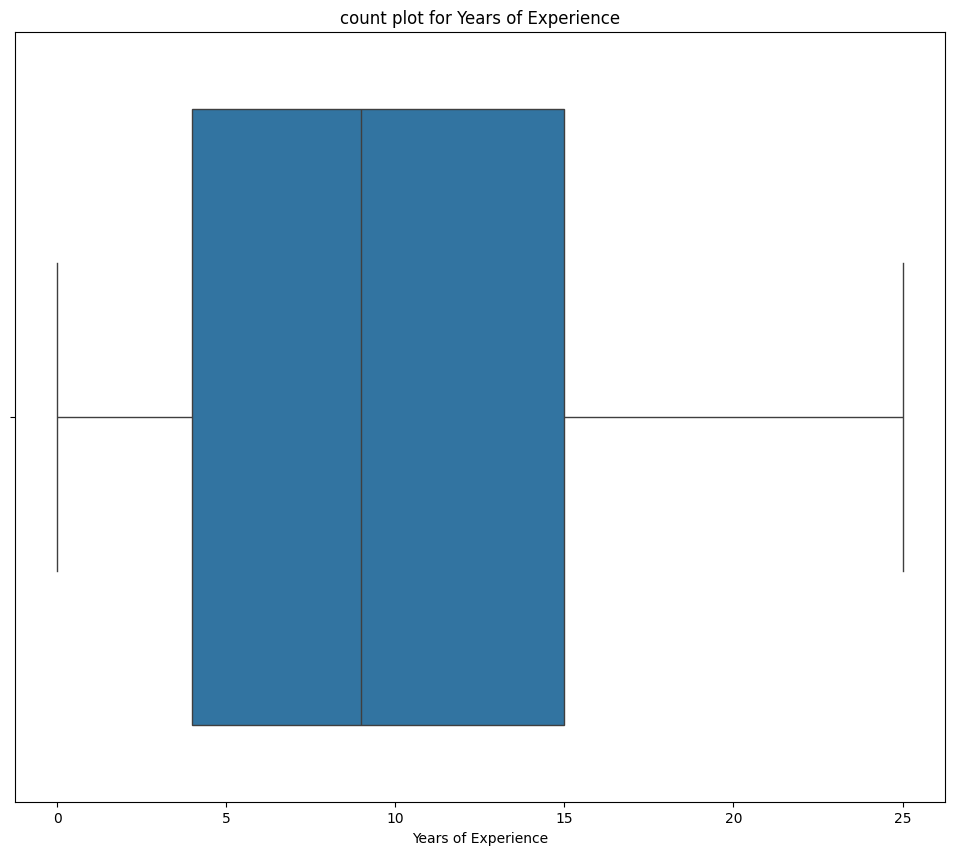

In [14]:
## checking for outlier

for col in num_cols:
    plt.figure(figsize=(12,10))
    sns.boxplot(x=col,data=df_clean)
    plt.title(f"count plot for {col}")
    plt.show()

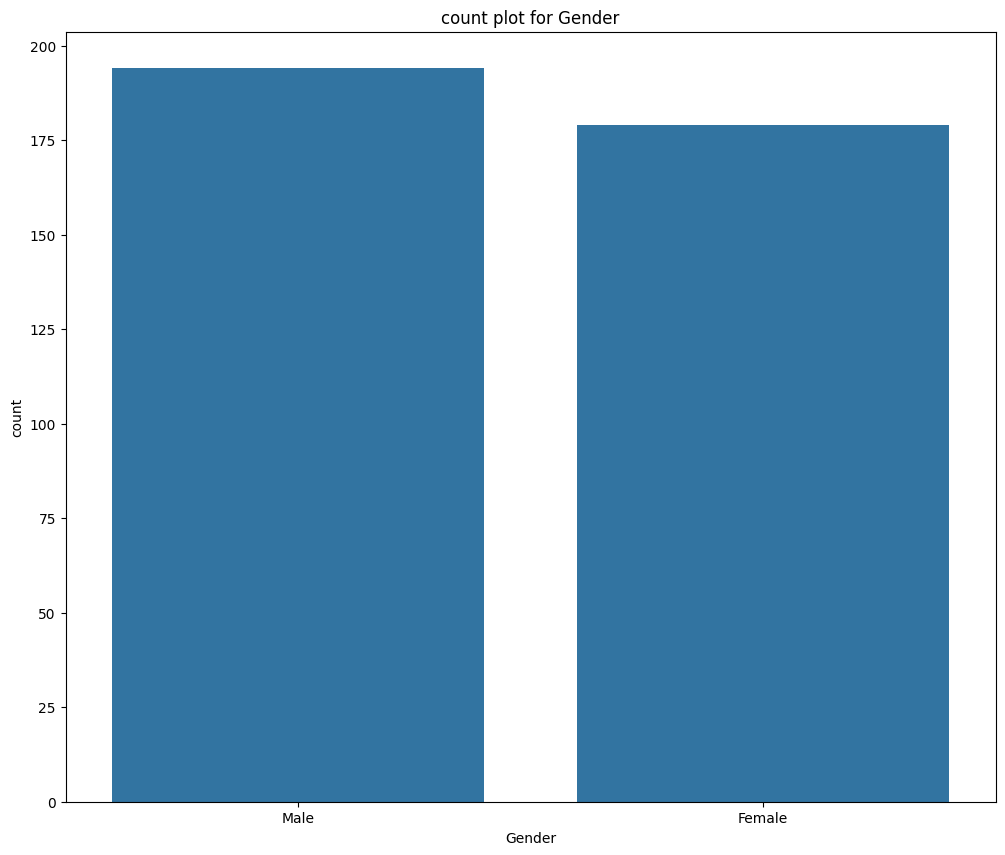

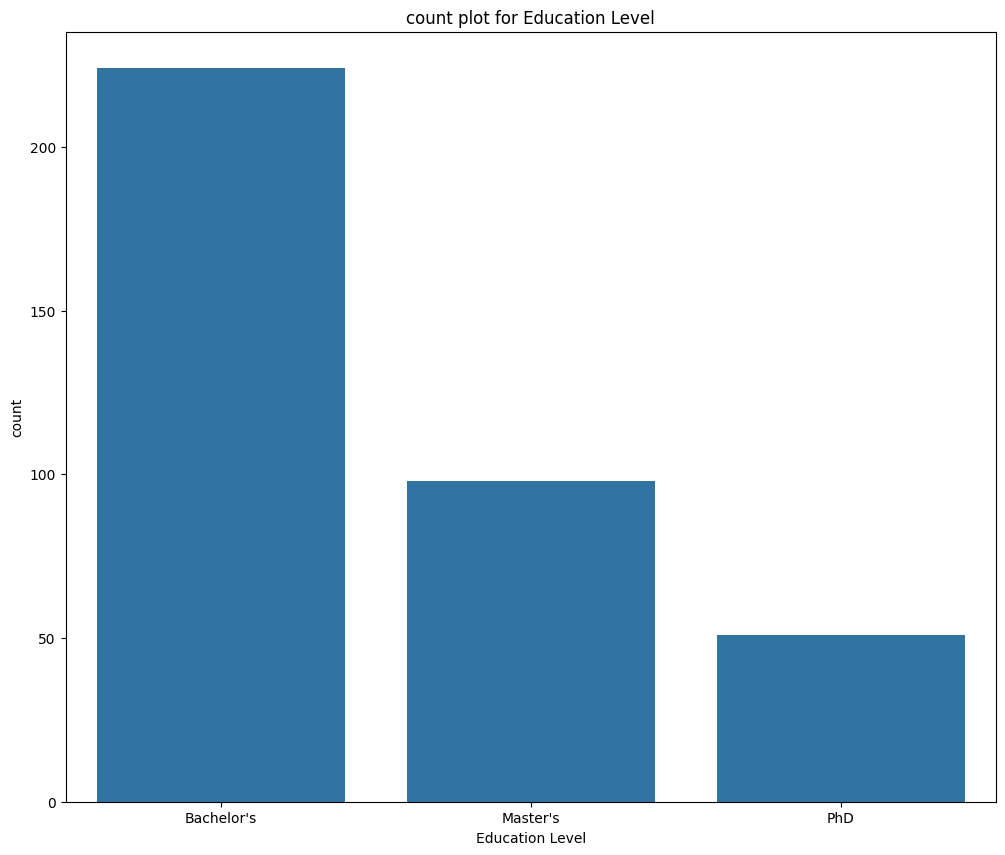

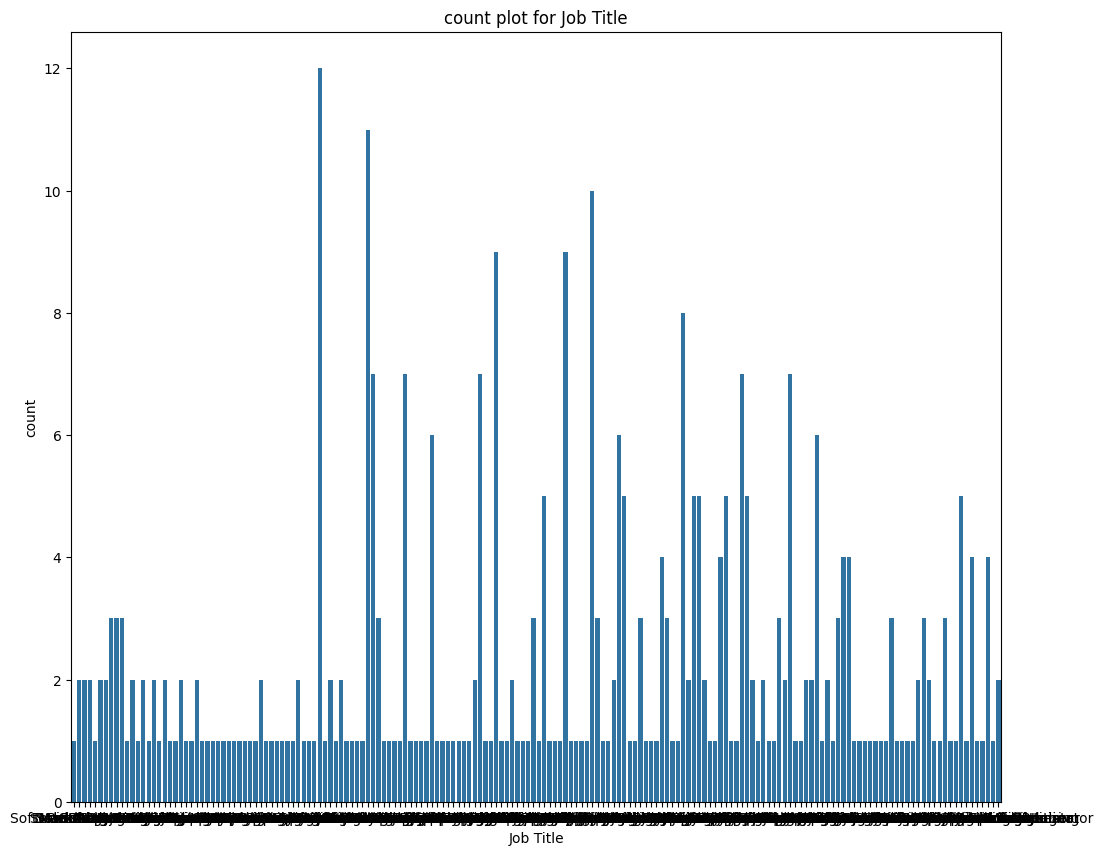

In [15]:
## cat col

for col in cat_cols:
    plt.figure(figsize=(12,10))
    sns.countplot(x=col,data=df_clean)
    plt.title(f"count plot for {col}")
    plt.show()

In [16]:
df_clean['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [17]:
print(df_clean['Job Title'].value_counts())

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64


 Bivariate Analysis (Feature vs Target)

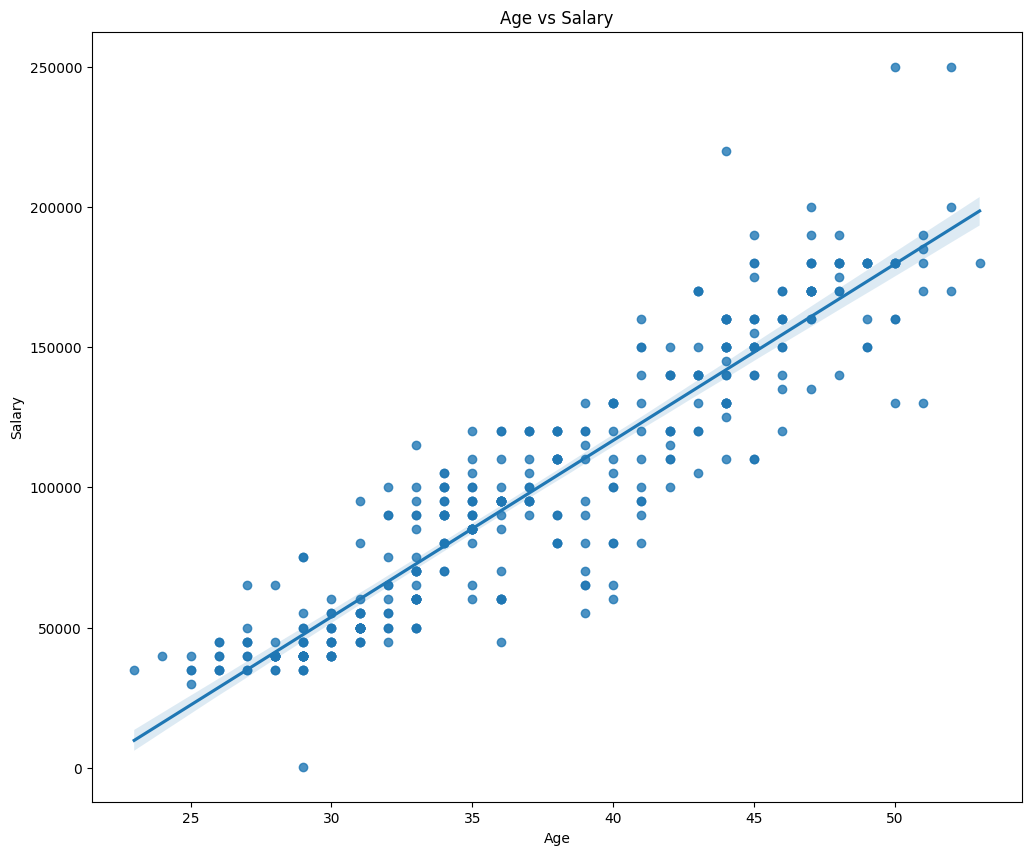

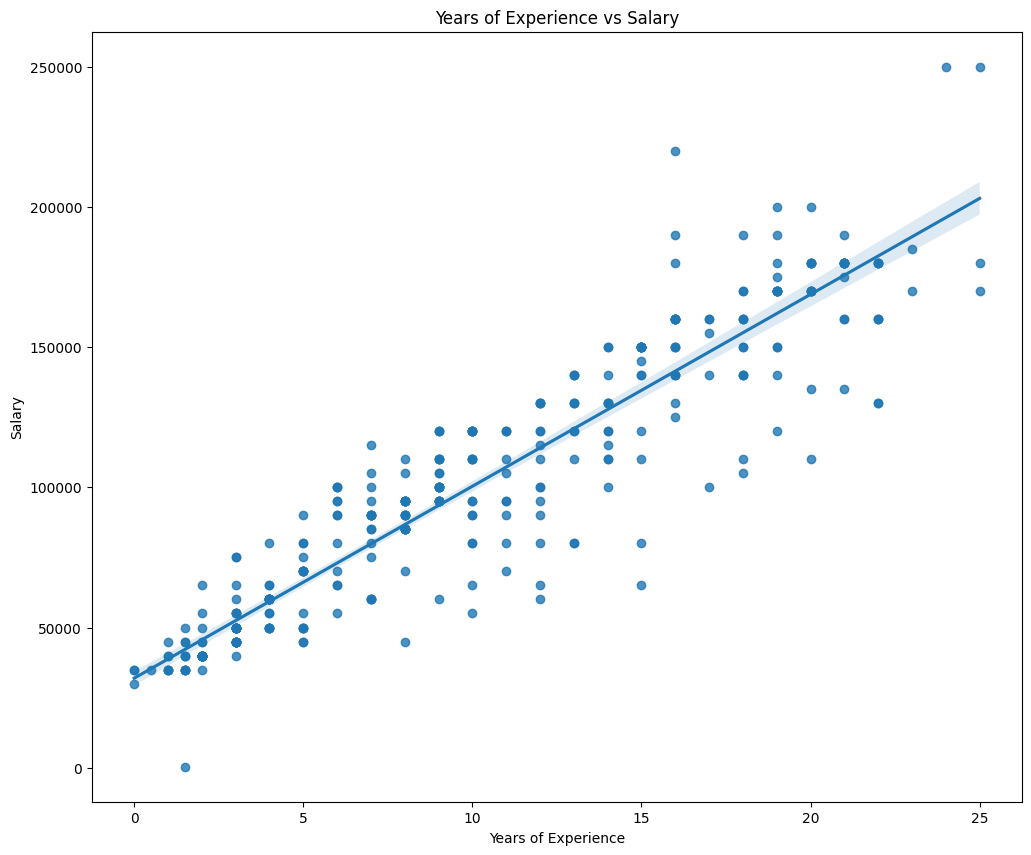

In [18]:
## Num fea vs target

for col in num_cols:
    plt.figure(figsize=(12,10))
    sns.regplot(x=col , y='Salary' , data=df_clean , )
    plt.title(f"{col} vs Salary")
    plt.show()

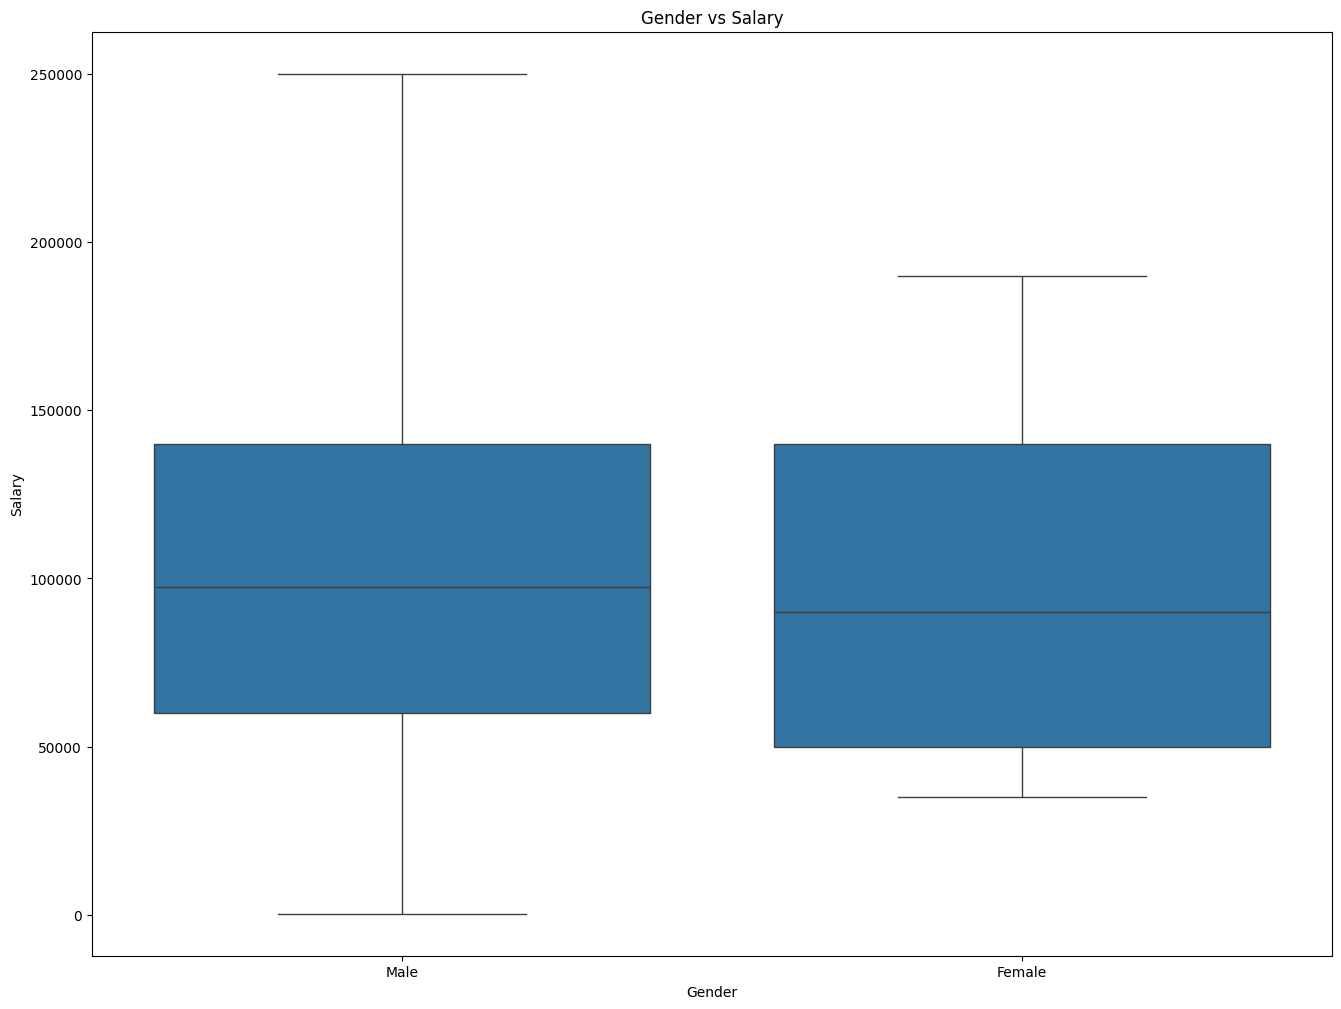

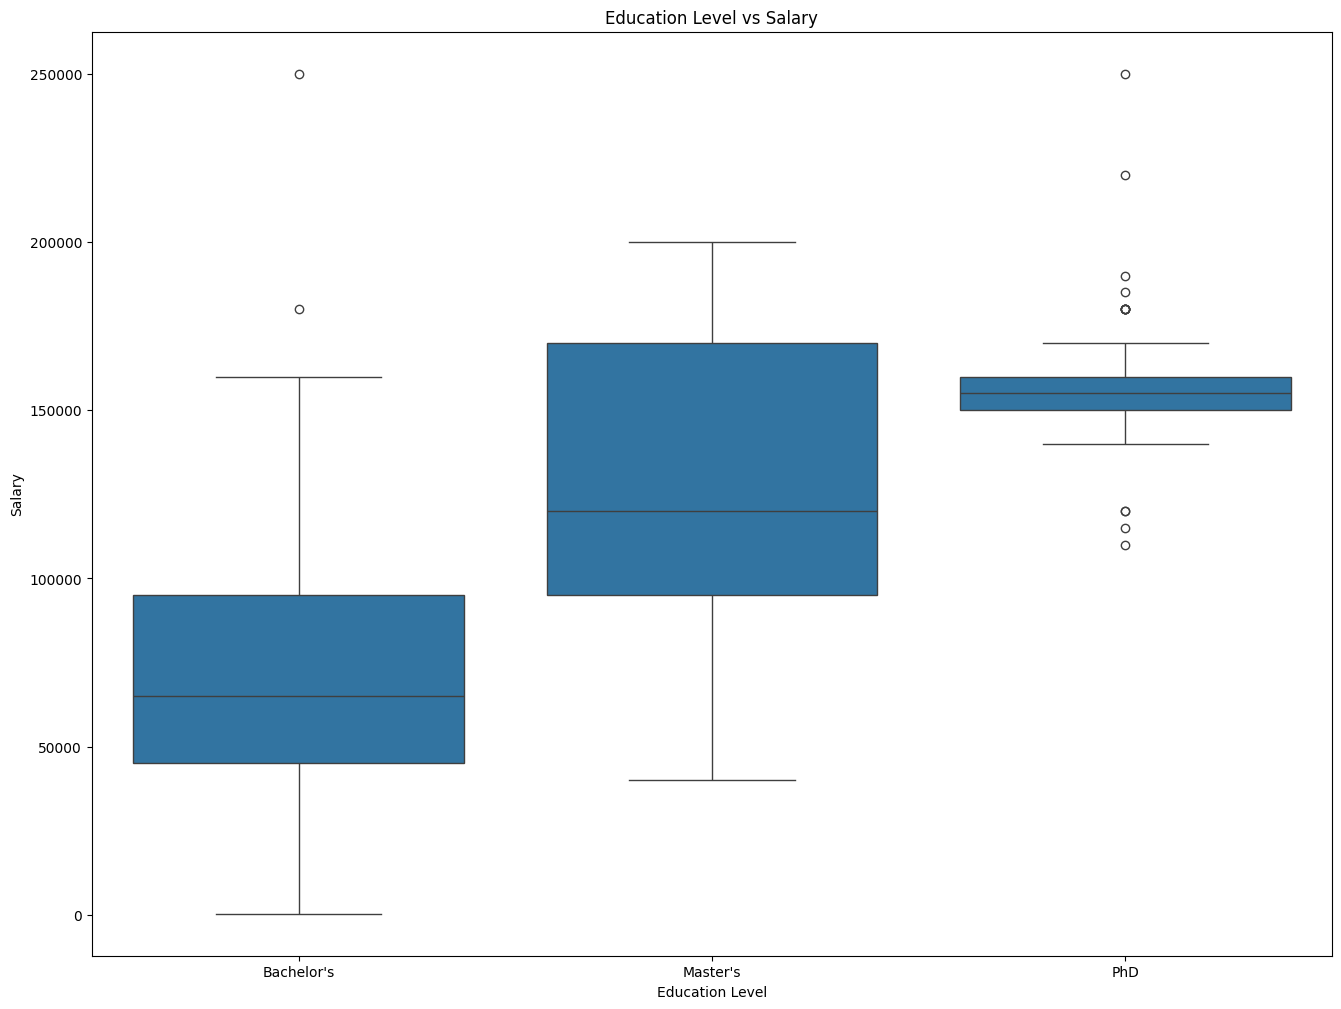

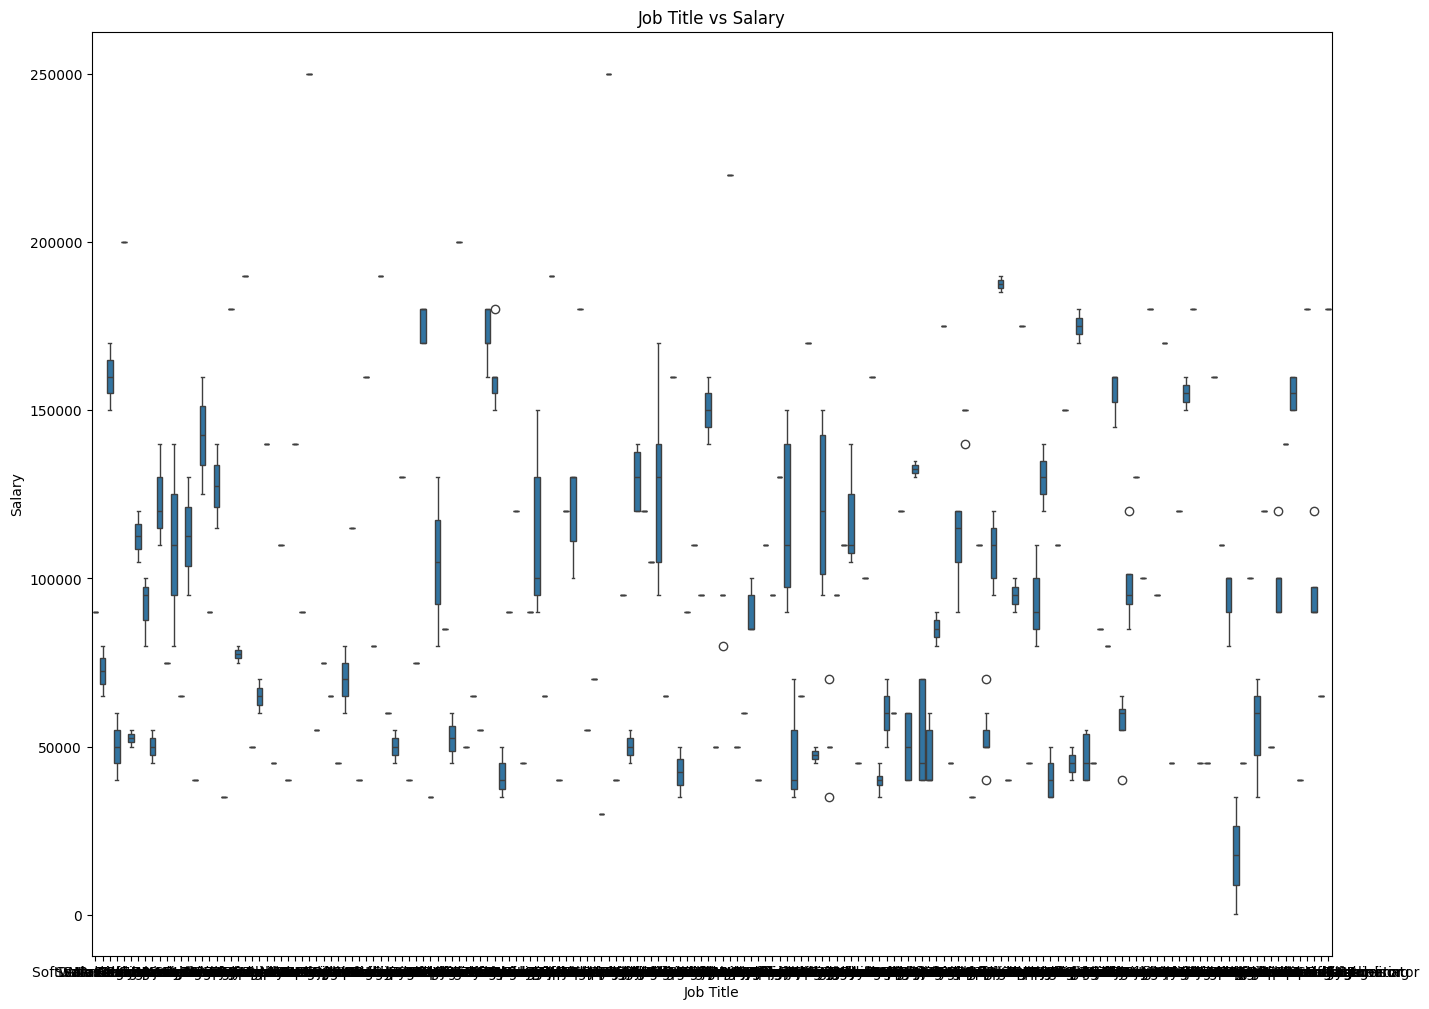

In [19]:
##cat_cols vs target



for col in cat_cols:
    plt.figure(figsize=(16,12))
    sns.boxplot(x=col , y='Salary' , data=df_clean )
    plt.title(f"{col} vs Salary")
    plt.show()

Data Preprocessing


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [21]:
X = df_clean.drop('Salary', axis=1)
y = df_clean['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
numeric_features = ["Age", "Years of Experience"]
nominal_features = ["Gender", "Job Title"]
ordinal_features = ["Education Level"]

education_order = [["Bachelor's", "Master's", "PhD"]]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("nom", OneHotEncoder(handle_unknown="ignore"), nominal_features),
        ("ord", OrdinalEncoder(categories=education_order), ordinal_features),
    ]
)


Model-Training

In [23]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score , root_mean_squared_error

In [24]:
models = [
    ("Linear", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=500,max_depth=10,random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=800,max_depth=6,learning_rate=0.03,subsample=0.8,colsample_bytree=0.8,reg_alpha=1,reg_lambda=1,random_state=42,tree_method="hist")),
    ("DecisionTree", DecisionTreeRegressor(random_state=42)),
    ("GradientBoost", GradientBoostingRegressor(random_state=42))
]

results = []


for name, model in models:
    
    pipe = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ]
    )
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_model_pred = pipe.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_model_pred)
    mse = mean_squared_error(y_test, y_model_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_model_pred)
    
    results.append({
        "Model": name,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    })

In [25]:
results_df = pd.DataFrame(results)
print(results_df)

           Model        R2           MAE          RMSE
0         Linear  0.851675  11631.702342  18857.953732
1  Random Forest  0.871890  10384.131348  17525.825260
2        XGBoost  0.883603  10162.020156  16705.401234
3   DecisionTree  0.793542  12200.000000  22248.595461
4  GradientBoost  0.865554  10763.584865  17953.989868


In [26]:
best = results_df.sort_values("R2", ascending=False).iloc[0]
print("Best model is:", best["Model"])

Best model is: XGBoost


In [27]:

results = []

models = [
    ("Linear", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=500,max_depth=10,random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=800,max_depth=6,learning_rate=0.03,subsample=0.8,colsample_bytree=0.8,reg_alpha=1,reg_lambda=1,random_state=42,tree_method="hist")),
    ("DecisionTree", DecisionTreeRegressor(random_state=42)),
    ("GradientBoost", GradientBoostingRegressor(random_state=42))
]

for name, model in models:
    
    pipe = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ]
    )
    
    # Train
    pipe.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Gap (Train-Test)": train_r2 - test_r2
    })


In [28]:
results_df = pd.DataFrame(results)
results_df

,Model,Train R2,Test R2,Gap (Train-Test)
0,Linear,0.983193,0.851675,0.131518
1,Random Forest,0.980090,0.871890,0.108200
2,XGBoost,0.994691,0.883603,0.111087
3,DecisionTree,0.999124,0.793542,0.205582
4,GradientBoost,0.971399,0.865554,0.105846
